# Workshop 3: Advanced Techniques

In this workshop we will learn techniques to increase the performance of CNN and how to use state of the art architectures. The structure of the workshop will be the following:



1.   Dropout
2.   Batch Normalization
3.   Data Augmentation
4.   Transfer learning



## 1. Dropout

In [40]:
# Import dependence for downloading CIFAR100
from tensorflow import keras
from keras.datasets import cifar100

In [41]:
(X_train, y_train), (X_testval, y_testval) = cifar100.load_data()

In [42]:
# Import dependence for handling arrays
import numpy as np

In [43]:
# Change the range of pixels from [0 255] to [0 1]
X_train_fl = X_train.astype('float32')
X_testval_fl = X_testval.astype('float32')
X_train_fl /= 255
X_testval_fl /= 255

In [44]:
# Import dependence for one-hot encoding
from sklearn.preprocessing import OneHotEncoder

In [45]:
# One-hot encoding of labels
onehot_enc = OneHotEncoder()
y_train_oh = onehot_enc.fit_transform(y_train.reshape(X_train.shape[0], 1)).toarray()
y_testval_oh = onehot_enc.fit_transform(y_testval.reshape(X_testval.shape[0], 1)).toarray()

In [46]:
# Show one-hot encoded labels shape
print("Training one-hot encoded labels shape:", y_train_oh.shape)
print("Testing one-hot encoded labels shape:", y_testval_oh.shape)

Training one-hot encoded labels shape: (50000, 100)
Testing one-hot encoded labels shape: (10000, 100)


In [47]:
# Divide testval in test and validation partitions
samples_test_nb = int(X_testval.shape[0]/2)
X_val = X_testval_fl[:samples_test_nb]
y_val = y_testval_oh[:samples_test_nb]
X_test = X_testval_fl[samples_test_nb:]
y_test = y_testval_oh[samples_test_nb:]

In [48]:
# Show shapes of test and validation partitions
print("Validation matrix shape:", X_val.shape)
print("Testing matrix shape:", X_test.shape)

Validation matrix shape: (5000, 32, 32, 3)
Testing matrix shape: (5000, 32, 32, 3)


In [49]:
# Import depence for CNN
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [50]:
# Define the model
input_layer = Input(shape=(X_train.shape[1],X_train.shape[2], X_train.shape[3]))
conv_layer_1 = Conv2D(filters=8, kernel_size=(3, 3), activation='relu')(input_layer)
maxpool_layer_1 = MaxPool2D(pool_size=(2, 2))(conv_layer_1)
conv_layer_2 = Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(maxpool_layer_1)
maxpool_layer_2 = MaxPool2D(pool_size=(2, 2))(conv_layer_2)
conv_layer_3 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(maxpool_layer_2)
flatten_layer = Flatten()(conv_layer_3)
dense_layer = Dense(128, activation='relu')(flatten_layer)
dropout = Dropout(rate=0.4)(dense_layer)
output_layer = Dense(100, activation='softmax')(dropout)
model= Model(inputs=input_layer, outputs=output_layer)

In [13]:
# Show a summary of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 8)         224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          4640  

In [14]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [14]:
# Train the model
history = model.fit(X_train_fl, y_train_oh, epochs=50, batch_size=128,
                    validation_data=(X_val, y_val))

Epoch 1/50
391/391 [==============================] - 18s 13ms/step - loss: 4.2301 - accuracy: 0.0564 - val_loss: 3.8137 - val_accuracy: 0.1208
Epoch 2/50
391/391 [==============================] - 3s 9ms/step - loss: 3.7706 - accuracy: 0.1239 - val_loss: 3.4947 - val_accuracy: 0.1738
Epoch 3/50
391/391 [==============================] - 3s 8ms/step - loss: 3.5588 - accuracy: 0.1585 - val_loss: 3.3389 - val_accuracy: 0.2066
Epoch 4/50
391/391 [==============================] - 2s 6ms/step - loss: 3.4313 - accuracy: 0.1777 - val_loss: 3.2750 - val_accuracy: 0.2136
Epoch 5/50
391/391 [==============================] - 2s 6ms/step - loss: 3.3397 - accuracy: 0.1944 - val_loss: 3.1833 - val_accuracy: 0.2278
Epoch 6/50
391/391 [==============================] - 2s 6ms/step - loss: 3.2705 - accuracy: 0.2078 - val_loss: 3.1194 - val_accuracy: 0.2448
Epoch 7/50
391/391 [==============================] - 2s 6ms/step - loss: 3.2250 - accuracy: 0.2139 - val_loss: 3.0849 - val_accuracy: 0.2496
Epoc

In [15]:
# Import dependence for visualization of images
import matplotlib.pyplot as plt

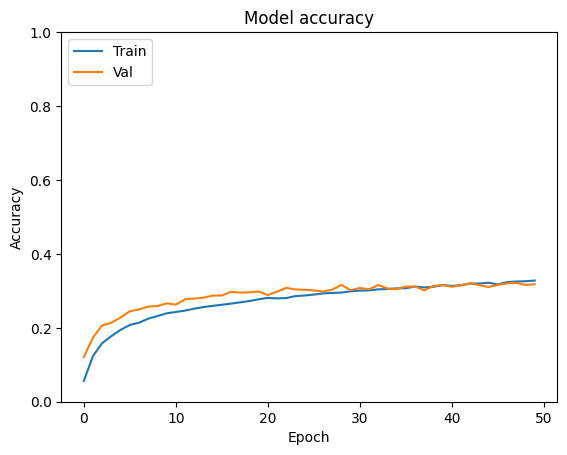

In [16]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.ylim(0, 1)
plt.show()

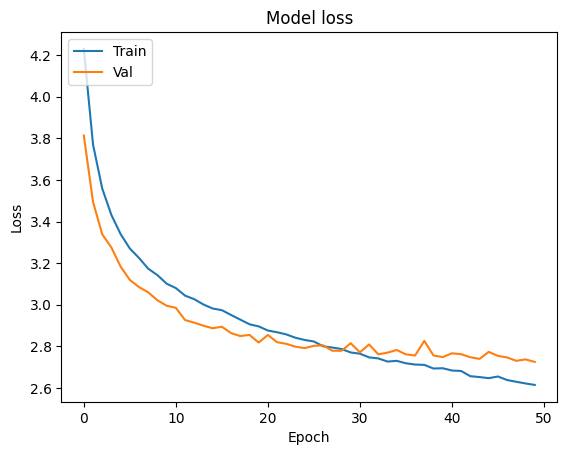

In [17]:
# Plot training and test loss
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Val'], loc='upper left') 
plt.show()

## 2. Batch Normalization

In [16]:
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

In [17]:
# Define the model
input_layer = Input(shape=(X_train.shape[1],X_train.shape[2], X_train.shape[3]))
conv_layer_1 = Conv2D(filters=8, kernel_size=(3, 3), activation='relu')(input_layer)
bn_1 = BatchNormalization()(conv_layer_1)
maxpool_layer_1 = MaxPool2D(pool_size=(2, 2))(bn_1)
conv_layer_2 = Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(maxpool_layer_1)
bn_2 = BatchNormalization()(conv_layer_2)
maxpool_layer_2 = MaxPool2D(pool_size=(2, 2))(bn_2)
conv_layer_3 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(maxpool_layer_2)
bn_3 = BatchNormalization()(conv_layer_3)
flatten_layer = Flatten()(bn_3)
dense_layer = Dense(128, activation='relu')(flatten_layer)
dropout = Dropout(rate=0.4)(dense_layer)
output_layer = Dense(100, activation='softmax')(dropout)
model= Model(inputs=input_layer, outputs=output_layer)

In [18]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(),
              metrics=['accuracy'])

In [21]:
# Train the model
history = model.fit(X_train_fl, y_train_oh, epochs=20, batch_size=128,
                    validation_data=(X_val, y_val))

Epoch 1/20
391/391 [==============================] - 8s 13ms/step - loss: 4.1521 - accuracy: 0.0836 - val_loss: 4.0441 - val_accuracy: 0.0876
Epoch 2/20
391/391 [==============================] - 3s 7ms/step - loss: 3.5858 - accuracy: 0.1576 - val_loss: 3.3078 - val_accuracy: 0.2034
Epoch 3/20
391/391 [==============================] - 3s 7ms/step - loss: 3.3356 - accuracy: 0.1997 - val_loss: 3.1086 - val_accuracy: 0.2348
Epoch 4/20
391/391 [==============================] - 3s 7ms/step - loss: 3.1646 - accuracy: 0.2306 - val_loss: 3.0383 - val_accuracy: 0.2538
Epoch 5/20
391/391 [==============================] - 3s 7ms/step - loss: 3.0472 - accuracy: 0.2498 - val_loss: 2.9222 - val_accuracy: 0.2776
Epoch 6/20
391/391 [==============================] - 3s 8ms/step - loss: 2.9508 - accuracy: 0.2689 - val_loss: 2.8594 - val_accuracy: 0.2898
Epoch 7/20
391/391 [==============================] - 3s 7ms/step - loss: 2.8770 - accuracy: 0.2807 - val_loss: 2.9118 - val_accuracy: 0.2878
Epoch

In [22]:
# Compile the model with new learning rate
model= Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01),
              metrics=['accuracy'])

In [23]:
# Train the model
history = model.fit(X_train_fl, y_train_oh, epochs=20, batch_size=128,
                    validation_data=(X_val, y_val))

Epoch 1/20
391/391 [==============================] - 7s 7ms/step - loss: 2.4598 - accuracy: 0.3594 - val_loss: 2.7699 - val_accuracy: 0.3210
Epoch 2/20
391/391 [==============================] - 3s 9ms/step - loss: 2.4437 - accuracy: 0.3631 - val_loss: 2.6454 - val_accuracy: 0.3400
Epoch 3/20
391/391 [==============================] - 3s 7ms/step - loss: 2.4270 - accuracy: 0.3663 - val_loss: 2.6413 - val_accuracy: 0.3410
Epoch 4/20
391/391 [==============================] - 3s 7ms/step - loss: 2.4096 - accuracy: 0.3698 - val_loss: 2.8699 - val_accuracy: 0.3010
Epoch 5/20
391/391 [==============================] - 3s 7ms/step - loss: 2.3980 - accuracy: 0.3721 - val_loss: 2.6219 - val_accuracy: 0.3468
Epoch 6/20
391/391 [==============================] - 3s 8ms/step - loss: 2.3805 - accuracy: 0.3737 - val_loss: 2.6421 - val_accuracy: 0.3386
Epoch 7/20
391/391 [==============================] - 3s 7ms/step - loss: 2.3746 - accuracy: 0.3758 - val_loss: 2.5827 - val_accuracy: 0.3558
Epoch 

## 3. Data Augmentation

In [51]:
from keras.preprocessing.image import ImageDataGenerator

In [52]:
# Define data generator
train_datagen = ImageDataGenerator(
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    rotation_range = 10,
)

In [53]:
# Function to convert a categorical class to its corresponding string
def class_to_string(class_int):
    class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup',
    'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo',
    'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree',
    'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree',
    'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit',
    'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk',
    'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank',
    'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale',
    'willow_tree', 'wolf', 'woman', 'worm']
    return class_names[class_int]

In [54]:
plt.rcParams['figure.figsize'] = (10,10)  # Configure figure size for 
                                          # appropriate visualization

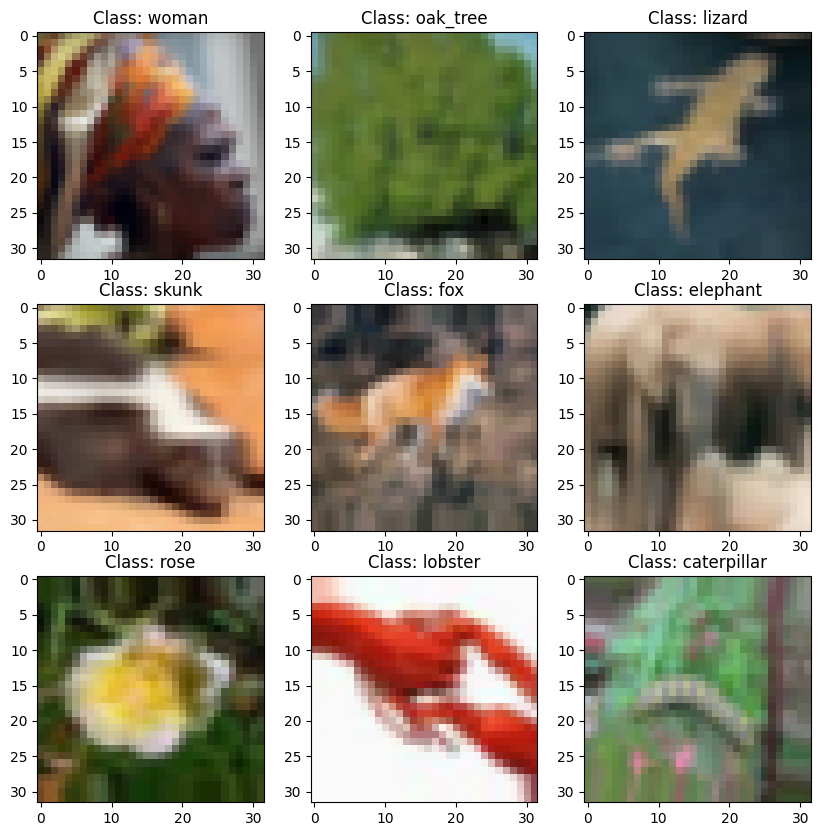

In [62]:
# Show generated data
iterator = train_datagen.flow(X_train_fl, y_train_oh, batch_size=9)
samples, labels = next(iterator)
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(samples[i], interpolation='none')
    class_str = class_to_string(np.argmax(labels[i]))
    plt.title("Class: " + class_str)

In [56]:
# Compile the model with new learning rate
model= Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [58]:
# Train the model
batch_size = 100
steps_per_epoch = X_train.shape[0] / batch_size
history = model.fit(train_datagen.flow(X_train_fl, y_train_oh, 
                                                 batch_size=batch_size), 
                              epochs=20,
                              steps_per_epoch=steps_per_epoch, 
                              validation_data=(X_val, y_val))

Epoch 1/20
500/500 [==============================] - 26s 52ms/step - loss: 3.9263 - accuracy: 0.0970 - val_loss: 3.6086 - val_accuracy: 0.1622
Epoch 2/20
500/500 [==============================] - 25s 50ms/step - loss: 3.6632 - accuracy: 0.1416 - val_loss: 3.4817 - val_accuracy: 0.1792
Epoch 3/20
500/500 [==============================] - 25s 51ms/step - loss: 3.5089 - accuracy: 0.1666 - val_loss: 3.3070 - val_accuracy: 0.2134
Epoch 4/20
500/500 [==============================] - 26s 52ms/step - loss: 3.4087 - accuracy: 0.1829 - val_loss: 3.2022 - val_accuracy: 0.2332
Epoch 5/20
500/500 [==============================] - 25s 50ms/step - loss: 3.3317 - accuracy: 0.1958 - val_loss: 3.1423 - val_accuracy: 0.2416
Epoch 6/20
500/500 [==============================] - 25s 50ms/step - loss: 3.2830 - accuracy: 0.2059 - val_loss: 3.1035 - val_accuracy: 0.2508
Epoch 7/20
500/500 [==============================] - 25s 49ms/step - loss: 3.2383 - accuracy: 0.2162 - val_loss: 3.0586 - val_accuracy:

In [63]:
# Train the model
batch_size = 100
steps_per_epoch = X_train.shape[0] / batch_size
history = model.fit_generator(train_datagen.flow(X_train_fl, y_train_oh, 
                                                 batch_size=batch_size), 
                              epochs=100,
                              steps_per_epoch=steps_per_epoch, 
                              validation_data=(X_val, y_val))

Epoch 1/100
  1/500 [..............................] - ETA: 28s - loss: 2.8185 - accuracy: 0.3000

<ipython-input-63-ffd31a9f8c82>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_datagen.flow(X_train_fl, y_train_oh,


500/500 [==============================] - 26s 51ms/step - loss: 2.9735 - accuracy: 0.2647 - val_loss: 2.7787 - val_accuracy: 0.3050
Epoch 2/100
500/500 [==============================] - 25s 50ms/step - loss: 2.9608 - accuracy: 0.2650 - val_loss: 2.8214 - val_accuracy: 0.2938
Epoch 3/100
500/500 [==============================] - 25s 50ms/step - loss: 2.9553 - accuracy: 0.2674 - val_loss: 2.8089 - val_accuracy: 0.3000
Epoch 4/100
500/500 [==============================] - 25s 50ms/step - loss: 2.9384 - accuracy: 0.2673 - val_loss: 2.7655 - val_accuracy: 0.3028
Epoch 5/100
500/500 [==============================] - 25s 49ms/step - loss: 2.9354 - accuracy: 0.2680 - val_loss: 2.8068 - val_accuracy: 0.2950
Epoch 6/100
500/500 [==============================] - 25s 50ms/step - loss: 2.9207 - accuracy: 0.2709 - val_loss: 2.7800 - val_accuracy: 0.3038
Epoch 7/100
500/500 [==============================] - 25s 50ms/step - loss: 2.9185 - accuracy: 0.2726 - val_loss: 2.7167 - val_accuracy: 0.32

KeyboardInterrupt: ignored

## 4. Transfer Learning

In [64]:
# Import dependences for transfer learning
from tensorflow.keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import UpSampling2D
from tensorflow.keras.optimizers import RMSprop

In [68]:
# Define the model
resnet_model = ResNet50(weights='imagenet', include_top=False, 
                        input_shape=(256, 256, 3))
model = Sequential()
model.add(UpSampling2D((2,2)))
model.add(UpSampling2D((2,2)))
model.add(UpSampling2D((2,2)))
model.add(resnet_model)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(100, activation='softmax'))

In [69]:
# Compile the model
model.compile(optimizer=RMSprop(lr=2e-5), loss='categorical_crossentropy', 
              metrics=['acc'])

In [ ]:
# Train the model
history = model.fit(X_train_fl, y_train_oh, epochs=5, batch_size=50, 
                    validation_data=(X_val, y_val))

Epoch 1/5
1000/1000 [==============================] - 641s 605ms/step - loss: 4.5608 - acc: 0.0251 - val_loss: 4.6179 - val_acc: 0.0142
Epoch 2/5
 580/1000 [================>.............] - ETA: 4:06 - loss: 4.2138 - acc: 0.0509

In [ ]:
# Train the model
batch_size = 20
steps_per_epoch = X_train.shape[0] / batch_size
history = model.fit_generator(train_datagen.flow(X_train_fl, y_train_oh, 
                                                 batch_size=batch_size), 
                              epochs=5,
                              steps_per_epoch=steps_per_epoch, 
                              validation_data=(X_val, y_val))

# Exercise 1: Experiment with other pre-trained models to evaluate results

In [ ]:
# Import dependences for transfer learning
from tensorflow.keras.applications import EfficientNetV2S
from keras.models import Sequential
from keras.layers import UpSampling2D
from tensorflow.keras.optimizers import RMSprop

In [ ]:
# Define the model
EffNet_model = EfficientNetV2S(weights='imagenet', include_top=False, 
                        input_shape=(256, 256, 3))
model = Sequential()
model.add(UpSampling2D((2,2)))
model.add(UpSampling2D((2,2)))
model.add(UpSampling2D((2,2)))
model.add(EffNet_model)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

82420632/82420632 [==============================] - 1s 0us/step


In [ ]:
# Compile the model
model.compile(optimizer=RMSprop(lr=2e-5), loss='categorical_crossentropy', 
              metrics=['acc'])

In [ ]:
# Train the model
history = model.fit(X_train_fl, y_train_oh, epochs=5, batch_size=50, 
                    validation_data=(X_val, y_val))

Epoch 1/5
1000/1000 [==============================] - 1085s 1s/step - loss: 0.8097 - acc: 0.7650 - val_loss: 0.8715 - val_acc: 0.7312
Epoch 2/5
1000/1000 [==============================] - 1000s 1000ms/step - loss: 0.4177 - acc: 0.8841 - val_loss: 0.8869 - val_acc: 0.7350
Epoch 3/5
1000/1000 [==============================] - 999s 999ms/step - loss: 0.3278 - acc: 0.9117 - val_loss: 0.6549 - val_acc: 0.7830
Epoch 4/5
1000/1000 [==============================] - 980s 980ms/step - loss: 0.2655 - acc: 0.9292 - val_loss: 0.9227 - val_acc: 0.7350
Epoch 5/5
1000/1000 [==============================] - 979s 979ms/step - loss: 0.2200 - acc: 0.9409 - val_loss: 2.6999 - val_acc: 0.2076


## 1.2 EFFICIENT NET + IMAGE GENERATOR

In [ ]:
# Import dependences for transfer learning
from tensorflow.keras.applications import EfficientNetV2S
from keras.models import Sequential
from keras.layers import UpSampling2D
from tensorflow.keras.optimizers import RMSprop

In [ ]:
# Define the model
EffNet_model = EfficientNetV2S(weights='imagenet', include_top=False, 
                        input_shape=(256, 256, 3))
model = Sequential()
model.add(UpSampling2D((2,2)))
model.add(UpSampling2D((2,2)))
model.add(UpSampling2D((2,2)))
model.add(EffNet_model)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data generator
train_datagen = ImageDataGenerator(
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    rotation_range = 10,
)

train_generator = train_datagen.flow(X_train_fl, y_train_oh, batch_size=50)


In [ ]:
model.compile(optimizer=RMSprop(lr=2e-5), loss='categorical_crossentropy', metrics=['acc'])


In [ ]:
history = model.fit(train_generator, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
1000/1000 [==============================] - 1078s 1000ms/step - loss: 0.9300 - acc: 0.7198 - val_loss: 1.2931 - val_acc: 0.6184
Epoch 2/5
  83/1000 [=>............................] - ETA: 14:39 - loss: 0.6002 - acc: 0.8313

KeyboardInterrupt: ignored

# Exercise 2: Use the concepts learnt to train a classifier for CIFAR100 dataset

In [ ]:
# Import dependence for downloading CIFAR100
from tensorflow import keras
from keras.datasets import cifar100

In [ ]:
(X_train, y_train), (X_testval, y_testval) = cifar100.load_data()

169001437/169001437 [==============================] - 2s 0us/step


In [ ]:
# Import dependence for handling arrays
import numpy as np

In [ ]:
# Change the range of pixels from [0 255] to [0 1]
X_train_fl = X_train.astype('float32')
X_testval_fl = X_testval.astype('float32')
X_train_fl /= 255
X_testval_fl /= 255

In [ ]:
# Import dependence for one-hot encoding
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# One-hot encoding of labels
onehot_enc = OneHotEncoder()
y_train_oh = onehot_enc.fit_transform(y_train.reshape(X_train.shape[0], 1)).toarray()
y_testval_oh = onehot_enc.fit_transform(y_testval.reshape(X_testval.shape[0], 1)).toarray()

In [ ]:
# Show one-hot encoded labels shape
print("Training one-hot encoded labels shape:", y_train_oh.shape)
print("Testing one-hot encoded labels shape:", y_testval_oh.shape)

Training one-hot encoded labels shape: (50000, 100)
Testing one-hot encoded labels shape: (10000, 100)


In [ ]:
# Divide testval in test and validation partitions
samples_test_nb = int(X_testval.shape[0]/2)
X_val = X_testval_fl[:samples_test_nb]
y_val = y_testval_oh[:samples_test_nb]
X_test = X_testval_fl[samples_test_nb:]
y_test = y_testval_oh[samples_test_nb:]

In [ ]:
# Show shapes of test and validation partitions
print("Validation matrix shape:", X_val.shape)
print("Testing matrix shape:", X_test.shape)

Validation matrix shape: (5000, 32, 32, 3)
Testing matrix shape: (5000, 32, 32, 3)


In [ ]:
# Import depence for CNN
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [ ]:
# Define the model
input_layer = Input(shape=(X_train.shape[1],X_train.shape[2], X_train.shape[3]))
conv_layer_1 = Conv2D(filters=8, kernel_size=(3, 3), activation='relu')(input_layer)
maxpool_layer_1 = MaxPool2D(pool_size=(2, 2))(conv_layer_1)
conv_layer_2 = Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(maxpool_layer_1)
maxpool_layer_2 = MaxPool2D(pool_size=(2, 2))(conv_layer_2)
conv_layer_3 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(maxpool_layer_2)
flatten_layer = Flatten()(conv_layer_3)
dense_layer = Dense(128, activation='relu')(flatten_layer)
dropout = Dropout(rate=0.4)(dense_layer)
output_layer = Dense(100, activation='softmax')(dropout)
model= Model(inputs=input_layer, outputs=output_layer)

In [ ]:
# Show a summary of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 8)         224       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 8)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 16)        1168      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 32)          4640

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train_fl, y_train_oh, epochs=50, batch_size=128,
                    validation_data=(X_val, y_val))

Epoch 1/50
391/391 [==============================] - 6s 7ms/step - loss: 4.2717 - accuracy: 0.0508 - val_loss: 3.8315 - val_accuracy: 0.1286
Epoch 2/50
391/391 [==============================] - 2s 5ms/step - loss: 3.8094 - accuracy: 0.1127 - val_loss: 3.5390 - val_accuracy: 0.1632
Epoch 3/50
391/391 [==============================] - 2s 5ms/step - loss: 3.6072 - accuracy: 0.1461 - val_loss: 3.3833 - val_accuracy: 0.1944
Epoch 4/50
391/391 [==============================] - 2s 5ms/step - loss: 3.4670 - accuracy: 0.1715 - val_loss: 3.2670 - val_accuracy: 0.2110
Epoch 5/50
391/391 [==============================] - 2s 5ms/step - loss: 3.3646 - accuracy: 0.1881 - val_loss: 3.2017 - val_accuracy: 0.2328
Epoch 6/50
391/391 [==============================] - 3s 7ms/step - loss: 3.2973 - accuracy: 0.2023 - val_loss: 3.1086 - val_accuracy: 0.2542
Epoch 7/50
391/391 [==============================] - 3s 8ms/step - loss: 3.2350 - accuracy: 0.2118 - val_loss: 3.0496 - val_accuracy: 0.2558
Epoch 

In [ ]:
# Import dependence for visualization of images
import matplotlib.pyplot as plt

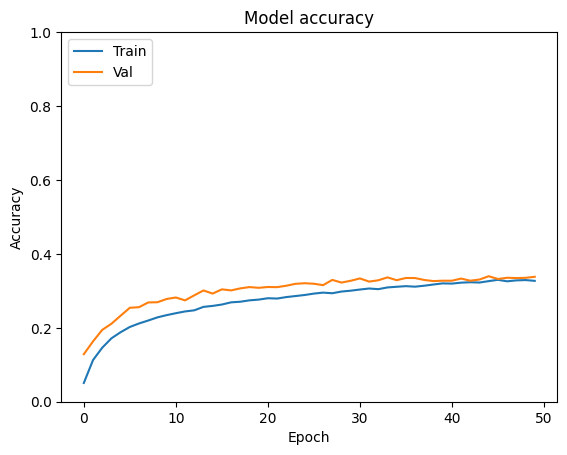

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.ylim(0, 1)
plt.show()

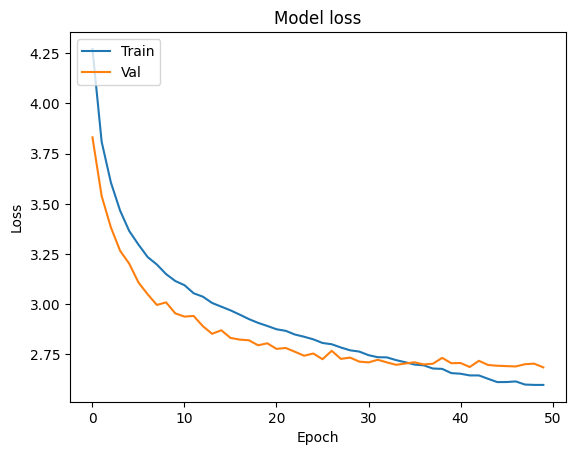

In [ ]:
# Plot training and test loss
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Val'], loc='upper left') 
plt.show()

In [ ]:
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

In [ ]:
# Define the model
input_layer = Input(shape=(X_train.shape[1],X_train.shape[2], X_train.shape[3]))
conv_layer_1 = Conv2D(filters=8, kernel_size=(3, 3), activation='relu')(input_layer)
bn_1 = BatchNormalization()(conv_layer_1)
maxpool_layer_1 = MaxPool2D(pool_size=(2, 2))(bn_1)
conv_layer_2 = Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(maxpool_layer_1)
bn_2 = BatchNormalization()(conv_layer_2)
maxpool_layer_2 = MaxPool2D(pool_size=(2, 2))(bn_2)
conv_layer_3 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(maxpool_layer_2)
bn_3 = BatchNormalization()(conv_layer_3)
flatten_layer = Flatten()(bn_3)
dense_layer = Dense(128, activation='relu')(flatten_layer)
dropout = Dropout(rate=0.4)(dense_layer)
output_layer = Dense(100, activation='softmax')(dropout)
model= Model(inputs=input_layer, outputs=output_layer)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01),
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train_fl, y_train_oh, epochs=20, batch_size=128,
                    validation_data=(X_val, y_val))

Epoch 1/20
391/391 [==============================] - 6s 7ms/step - loss: 4.1094 - accuracy: 0.0919 - val_loss: 3.7545 - val_accuracy: 0.1336
Epoch 2/20
391/391 [==============================] - 2s 6ms/step - loss: 3.5495 - accuracy: 0.1667 - val_loss: 3.4753 - val_accuracy: 0.1856
Epoch 3/20
391/391 [==============================] - 2s 6ms/step - loss: 3.3161 - accuracy: 0.2027 - val_loss: 3.2396 - val_accuracy: 0.2244
Epoch 4/20
391/391 [==============================] - 2s 6ms/step - loss: 3.1572 - accuracy: 0.2299 - val_loss: 2.9978 - val_accuracy: 0.2644
Epoch 5/20
391/391 [==============================] - 3s 8ms/step - loss: 3.0394 - accuracy: 0.2485 - val_loss: 3.0996 - val_accuracy: 0.2514
Epoch 6/20
391/391 [==============================] - 2s 6ms/step - loss: 2.9401 - accuracy: 0.2668 - val_loss: 2.9448 - val_accuracy: 0.2784
Epoch 7/20
391/391 [==============================] - 2s 6ms/step - loss: 2.8762 - accuracy: 0.2781 - val_loss: 2.7696 - val_accuracy: 0.3058
Epoch 

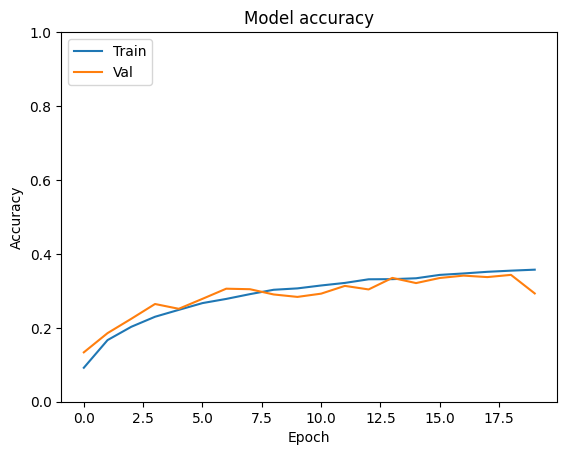

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.ylim(0, 1)
plt.show()